## Plot Precisio recall curves

In [14]:
import os
import json 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [17]:
#models_path = "C:/Users/jrtervens/Dropbox/Projects/remote_sensing/LC_classification_pytorch/models/"
models_path = "/datasets2/Dropbox/Projects/remote_sensing/LC_classification_pytorch/models/"

file_names = ["AlexNet-Pretrained_precision_recall_values.json", "ConvNeXt-Pretrained_precision_recall_values.json",
              "DenseNet-Pretrained_precision_recall_values.json", "EfficientNetV2-Pretrained_precision_recall_values.json",
              "MaxViT-Pretrained_precision_recall_values.json", "MobileNetV3-Pretrained_precision_recall_values.json",
              "ResNet50-Pretrained_precision_recall_values.json", "ResNeXt-Pretrained_precision_recall_values.json",
              "SwinB-Pretrained_precision_recall_values.json", "ViT32-Pretrained_precision_recall_values.json"]


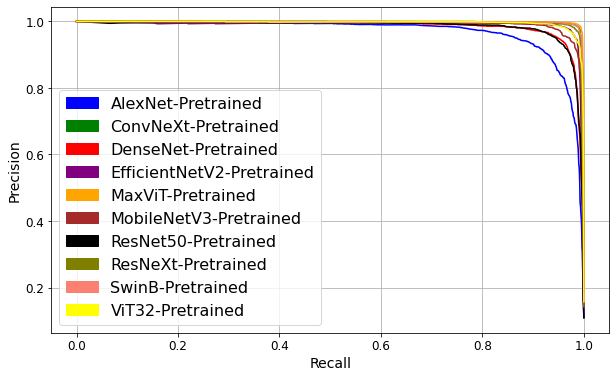

In [18]:
models_data = []
colors = ['blue', 'green', 'red', 'purple', 'orange',
          'brown', 'black', 'olive', 'salmon', 'yellow']  
legend_labels = []
legend_handles = []  # List to store legend handles

# Plotting the precision/recall curve
plt.figure(figsize=(10, 6))

for i, file_name in enumerate(file_names):
    file_path = models_path + file_name

    with open(file_path, 'r') as file:
        precision_recall_data = json.load(file)

    all_classes_data = precision_recall_data['All Classes']
    
    # Extract precision and recall values
    precisions = all_classes_data.get('precision', [])
    recalls = all_classes_data.get('recall', [])
    
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Precision': precisions,
        'Recall': recalls
    })
    
    model_data = {"model_name": file_name.split("_")[0],
                  "data": df}

    sns.lineplot(data=df, x='Recall', y='Precision', color=colors[i])
    legend_labels.append(model_data["model_name"])
    
    # Create a patch (proxy artist) for the legend
    patch = mpatches.Patch(color=colors[i], label=model_data["model_name"])
    legend_handles.append(patch)

#plt.title('Precision/Recall Curve')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)

# Set the fontsize for tick labels on both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(handles=legend_handles, fontsize=16, title_fontsize=16)
plt.grid(True)
plt.show()
